In [1]:
using Makie
AbstractPlotting.inline!(true)

false

In [3]:
using GLMakie
using AbstractPlotting.Colors


In [5]:
# create the scene
scene = lines(0..10, sin; linewidth=10)
lineplot = scene[end]

# animation settings
n_frames = 30
framerate = 30
hue_iterator = LinRange(0, 360, n_frames)

record(scene, "./img/color_animation.mp4", hue_iterator; framerate = framerate) do hue
    lineplot.color = HSV(hue, 1, 0.75)
end

"color_animation.mp4"

In [58]:
using Flux3D, Makie,Flux
using GeometryBasics
using AbstractPlotting


In [25]:
Makie.AbstractPlotting.set_theme!(show_axis = false, scale=false)

In [26]:
m = load_trimesh("teapot.obj")

TriMesh{Float32, UInt32, Array} Structure:
    Batch size: 1
    Max verts: 3644
    Max faces: 6320
    offset: -1
    Storage type: Array

In [27]:
p = PointCloud(m)

PointCloud{Float32} Structure:
    Batch size: 1
    Points: 1000
    Normals 0
    Storage type: Array{Float32,3}

In [72]:
v = VoxelGrid(m)

VoxelGrid{Float32} Structure:
    Batch size: 1
    Voxels features: 32
    Storage type: Array{Float32,4}

In [54]:
vbox(Flux3D.visualize(m), Flux3D.visualize(p), Flux3D.visualize(v))

LoadError: UndefVarError: visualize not defined

In [67]:
v

VoxelGrid{Float32} Structure:
    Batch size: 1
    Voxels features: 32
    Storage type: Array{Float32,4}

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /Users/amiraabdel-rahman/.julia/packages/AbstractPlotting/ru2ib/src/display.jl:135


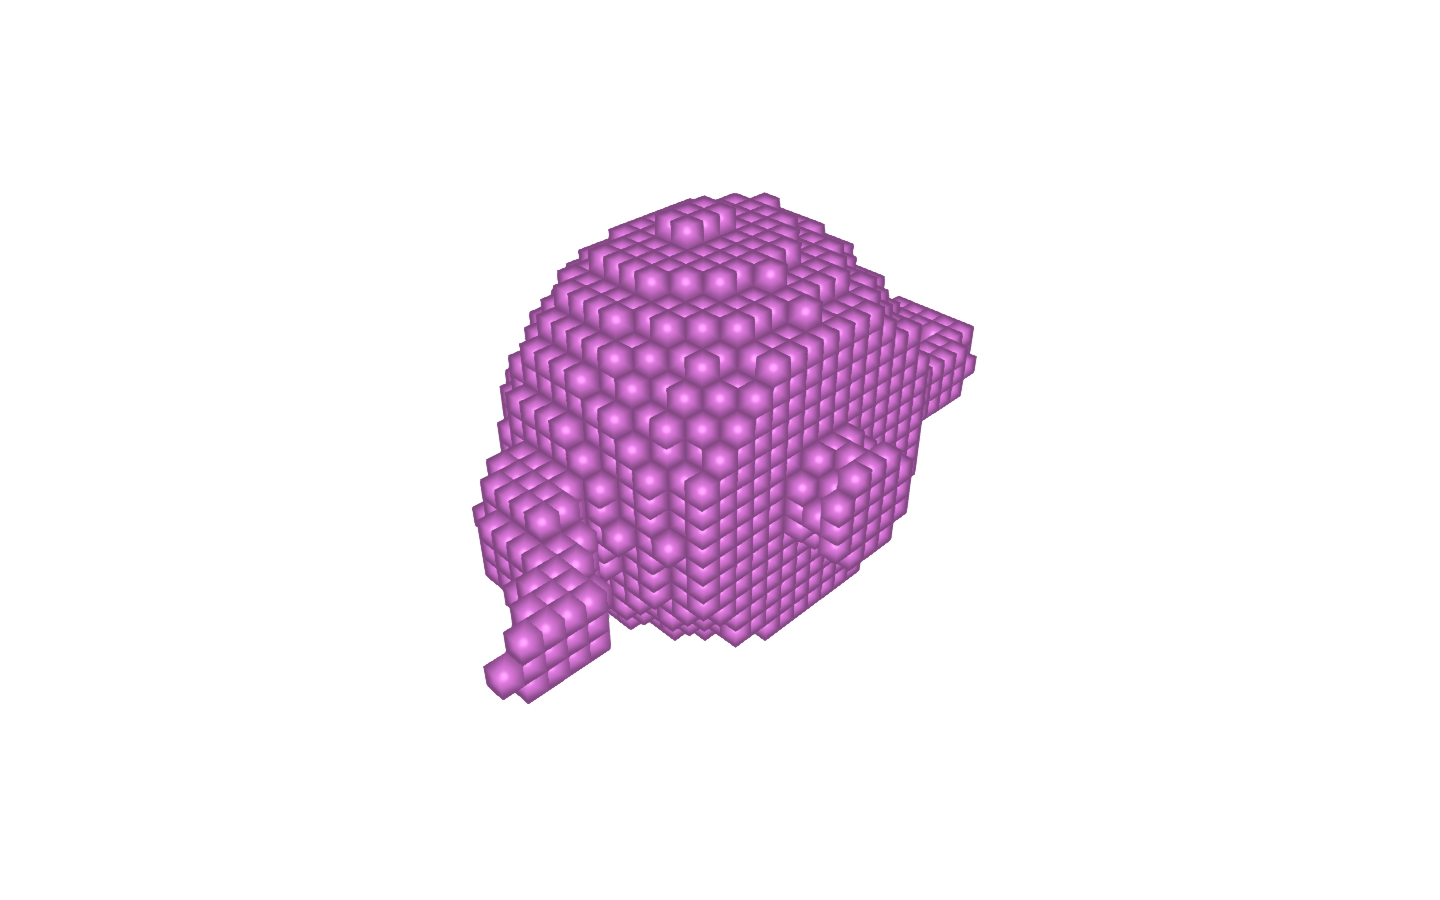

In [66]:
visualize(v)

In [ ]:
using GLMakie
using AbstractPlotting
AbstractPlotting.inline!(true)


┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /Users/amiraabdel-rahman/.julia/packages/AbstractPlotting/ru2ib/src/display.jl:135


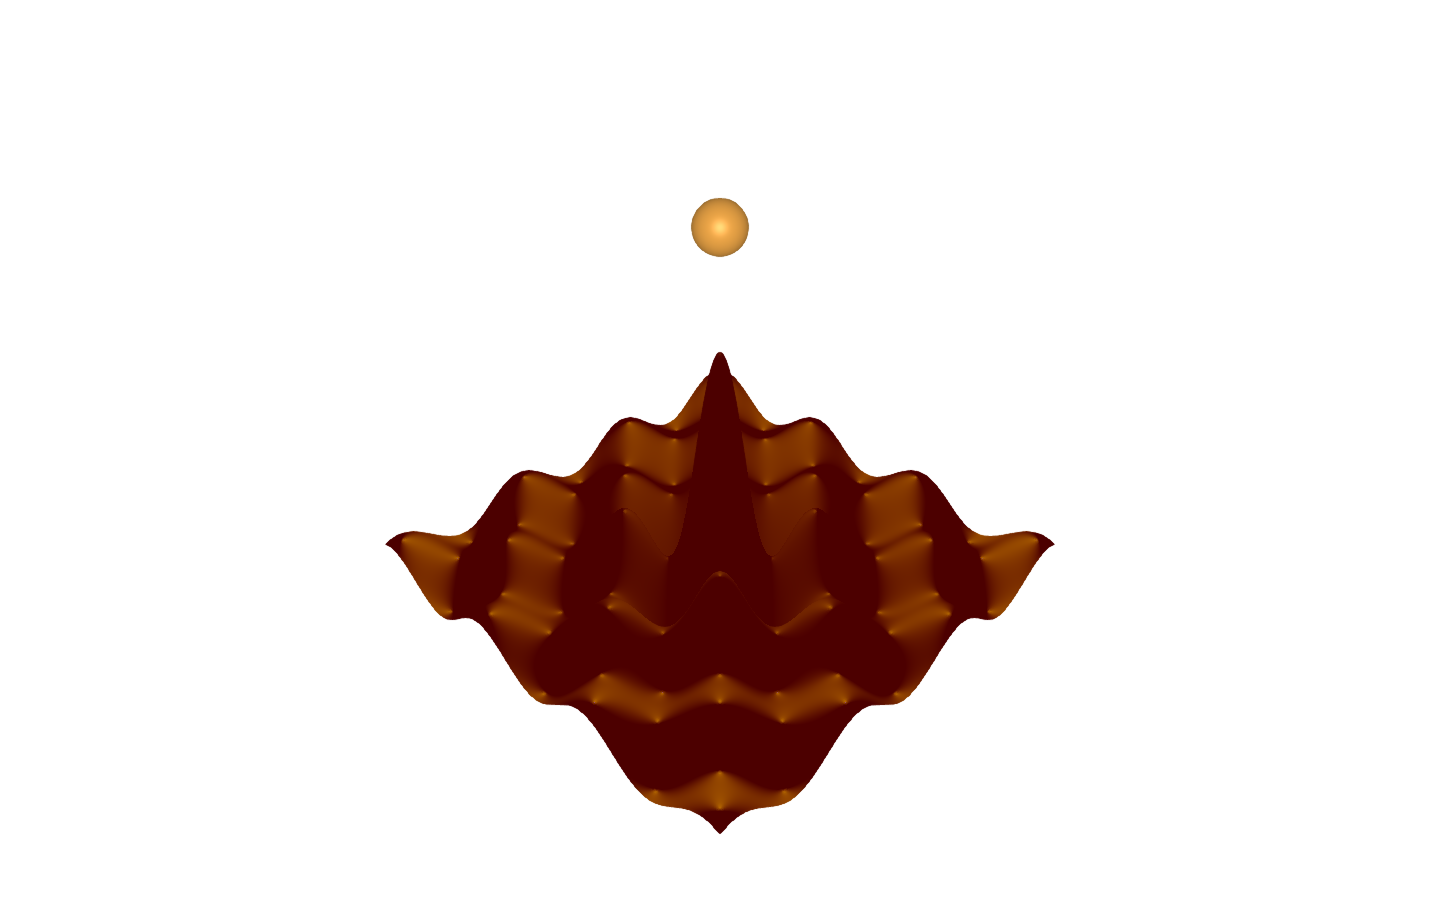

In [41]:

xs = -10:0.1:10
ys = -10:0.1:10
zs = [10 * (cos(x) * cos(y)) * (.1 + exp(-(x^2 + y^2 + 1)/10)) for x in xs, y in ys]


# Or use an LScene within a Figure
scene = Scene()
surface!(
    scene, xs, ys, zs, colormap = (:white, :white),

    # Light comes from (0, 0, 15), i.e the sphere
    lightposition = Vec3f0(0, 0, 15),
    # base light of the plot only illuminates red colors
    ambient = Vec3f0(0.3, 0, 0),
    # light from source (sphere) illuminates yellow colors
    diffuse = Vec3f0(0.4, 0.4, 0),
    # reflections illuminate blue colors
    specular = Vec3f0(0, 0, 1.0),
    # Reflections are sharp
    shininess = 128f0
)
mesh!(scene, Sphere(Point3f0(0, 0, 15), 1f0), color=RGBf0(1, 0.7, 0.3))
scene

In [64]:
"""
    visualize(pcloud::PointCloud; kwargs...)
Visualize PointCloud `pcloud` at `index`.
Dimension of points in PointCloud `pcloud` must be 3.
### Optional Arguments:
- color (Symbol)       - Color of the marker, default `:blue`
- markersize (Number)  - Size of the marker, default `npoints(pcloud)/5000`
"""
function visualize(p::PointCloud, index::Number = 1; kwargs...)
    points = cpu(p[index])
    size(points, 1) == 3 || error("dimension of points in PointCloud must be 3.")

    kwargs = convert(Dict{Symbol,Any}, kwargs)
    get!(kwargs, :color, :lightgreen)
    get!(kwargs, :markersize, npoints(p) / 5000)

    AbstractPlotting.meshscatter(points[1, :], points[2, :], points[3, :]; kwargs...)
end

"""
    visualize(m::TriMesh, index::Int=1; kwargs...)
Visualize mesh at `index` in TriMesh `m`.
### Optional Arguments:
- color (Symbol)       - Color of the marker, default `:red`
"""
function visualize(m::GeometryBasics.Mesh; kwargs...) where {T,R}
    kwargs = convert(Dict{Symbol,Any}, kwargs)
    get!(kwargs, :color, :orange)

    AbstractPlotting.mesh(GeometryBasics.normal_mesh(m); kwargs...)
end

visualize(m::TriMesh, index::Int = 1; kwargs...) = visualize(GBMesh(m, index); kwargs...)

"""
    visualize(v::VoxelGrid, index::Int=1; kwargs...)
Visualize voxel at `index` in VoxelGrid `v`.
### Optional Arguments:
- color (Symbol)       - Color of the marker, default `:red`
"""
function visualize(
    v::VoxelGrid,
    index::Int = 1,
    thresh::Number = 0.49f0;
    algo = :Exact,
    kwargs...,
)
    algo in [:Exact, :MarchingCubes, :MarchingTetrahedra, :NaiveSurfaceNets] ||
        error("given algo: $(algo) is not supported. Accepted algo are
              {:Exact,:MarchingCubes, :MarchingTetrahedra, :NaiveSurfaceNets}.")
    kwargs = convert(Dict{Symbol,Any}, kwargs)
    get!(kwargs, :color, :violet)
    method = algo == :Exact ? Flux3D._voxel_exact : Flux3D._voxel_algo
    v, f = method(cpu(v[index]), Float32(thresh), algo)

    m = GBMesh(v, f)
    AbstractPlotting.mesh(GeometryBasics.normal_mesh(m); kwargs...)
end

visualize

In [69]:
v, f = Flux3D._voxel_exact(cpu(v[1]), Float32(0.49f0), :Exact)

(Float32[14.0 14.0 … 16.0 16.0; 17.0 17.0 … 20.0 20.0; 4.0 5.0 … 24.0 25.0], UInt32[0x00000001 0x00000001 … 0x00002d52 0x00002d52; 0x00000007 0x00000003 … 0x00002d56 0x00002d58; 0x00000005 0x00000007 … 0x00002d58 0x00002d54])

In [70]:
v

3×11608 Array{Float32,2}:
 14.0  14.0  14.0  14.0  15.0  15.0  …  15.0  15.0  16.0  16.0  16.0  16.0
 17.0  17.0  18.0  18.0  17.0  17.0     20.0  20.0  19.0  19.0  20.0  20.0
  4.0   5.0   4.0   5.0   4.0   5.0     24.0  25.0  24.0  25.0  24.0  25.0

In [71]:
f

3×17412 Array{UInt32,2}:
 0x00000001  0x00000001  0x00000001  …  0x00002d51  0x00002d52  0x00002d52
 0x00000007  0x00000003  0x00000004     0x00002d56  0x00002d56  0x00002d58
 0x00000005  0x00000007  0x00000003     0x00002d52  0x00002d58  0x00002d54

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting /Users/amiraabdel-rahman/.julia/packages/AbstractPlotting/ru2ib/src/display.jl:135


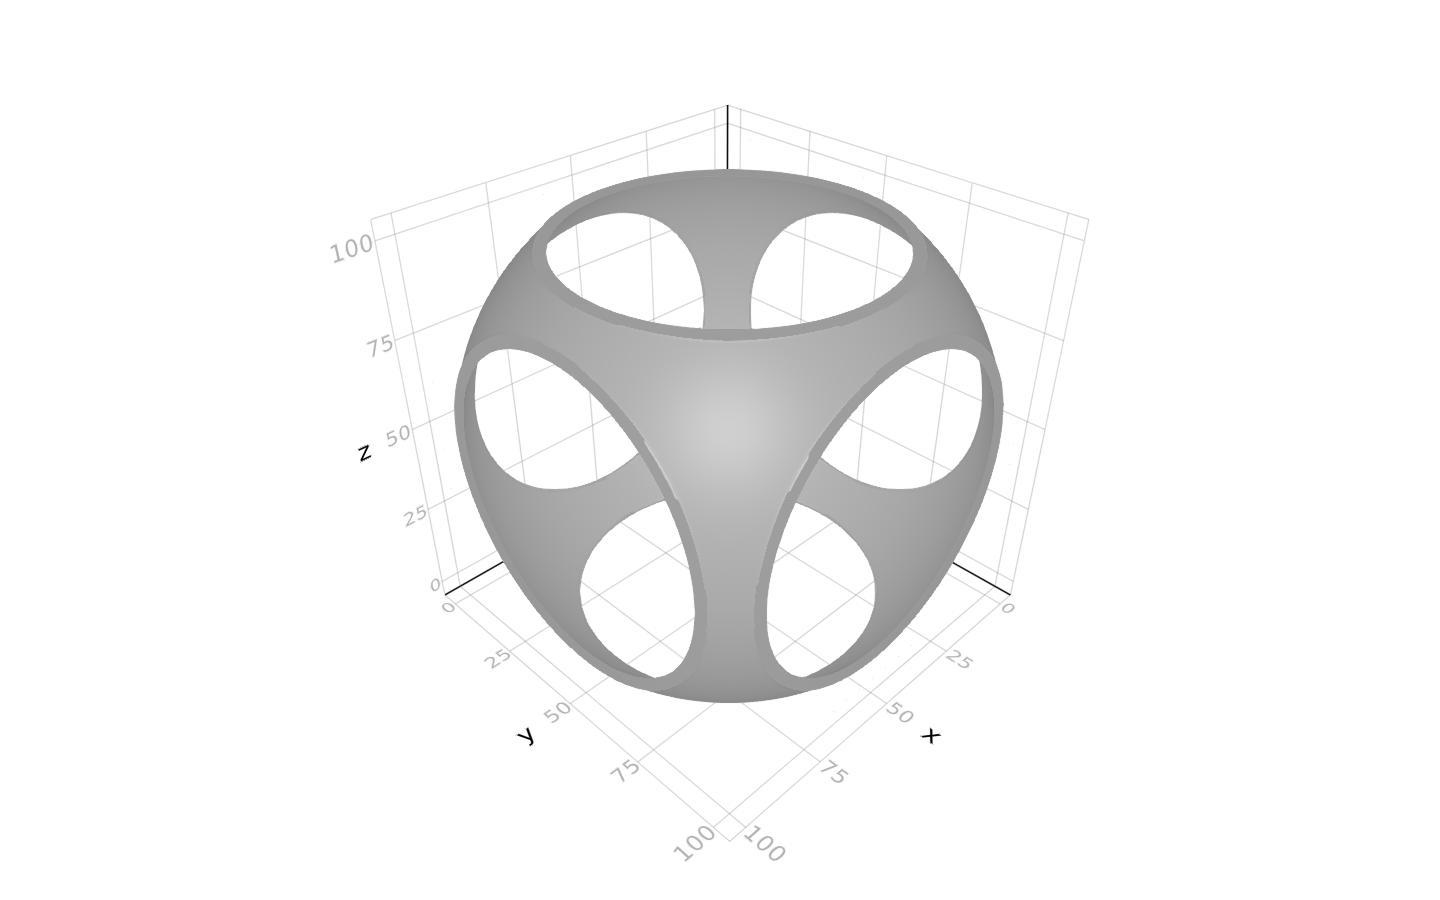

In [14]:
r = LinRange(-1, 1, 100)
cube = [(x.^2 + y.^2 + z.^2) for x = r, y = r, z = r]
cube_with_holes = cube .* (cube .> 1.4)

scene=volume(cube_with_holes, colormap=:grays,algorithm = :iso, isorange = 0.05, isovalue = 1.7)

In [15]:
save("./img/volTest.png",scene)


In [ ]:
anim=